# TITANIC SURVIVAL PREDICTION

# Importing Essential Libraries for the Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [5]:
my_project = pd.read_csv('titanic_tested.csv')

In [6]:
# call variable
my_project

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Preview information about dataset
my_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
# Describe the summary statistics
my_project.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Review first 5 rows
my_project.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Selection

In [10]:
# Calculate the number of null values in each column
my_project.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Checks the unique values in the sex column
my_project['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
# Counts the number of values in the sex column
my_project['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [13]:
# Checks the unique values in the Pclass (Passenger Class) column
my_project['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [14]:
# Counts the number of values in the Pclass column
my_project['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [15]:
# Checks the unique values in the Parch (Parents and Children) column
my_project['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [16]:
# Counts the number of values in the Parch column
my_project['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [17]:
# Counts the number of occurence of each unique value in the Survived column
my_project['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [18]:
# Checks the unique values in the Embarked column
my_project['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [19]:
# Counts the number of occurence of each unique value in the Embarked column
my_project['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
# Reviews the Siblings and Spouse column
my_project['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [21]:
# Counts the number of unique values in the Siblings and Spouse column
my_project['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [22]:
# Replaces all missing values in the Age column with the median value
my_project['Age'] = my_project['Age'].fillna(my_project['Age'].median())
my_project['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [23]:
# Confirm if any missing value still exists
my_project['Age'].isnull().sum()

0

In [24]:
# Drop columns that are not needed
# Drop the Name, Ticket and Cabin Column

pro_titanic = my_project.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [25]:
# Callback new variable
pro_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


In [26]:
# Evaluate the total missing values
pro_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [27]:
# Replace the missing value in the 'Fare' column with the mean value

pro_titanic['Fare'] = pro_titanic['Fare'].fillna(pro_titanic['Fare'].mean())
pro_titanic['Fare'].isnull().sum()

0

In [28]:
pro_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [29]:
# Review selected columns
pro_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


# Data Visualization

In [30]:
sn.set()

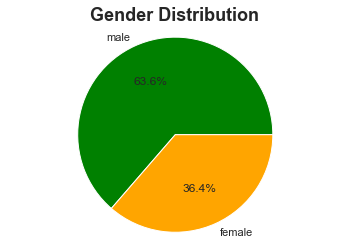

In [31]:
"""Compares proportion of male and female passengers using a Pie Chart"""
color = ['green', 'orange']
gender_count = pro_titanic['Sex'].value_counts()
mplt.pie(gender_count, labels= gender_count.index, autopct='%1.1f%%', colors= color)
mplt.title('Gender Distribution', fontdict={'size': 18, 'weight': 'bold'})
mplt.axis('equal')
mplt.show()

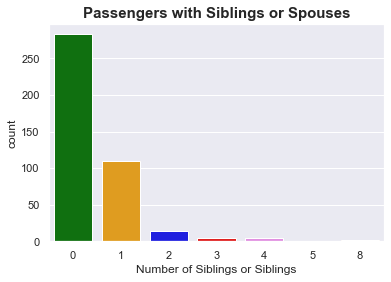

In [32]:
# Counts the number of passengers with siblings or spouses
colors = ["green", "orange", "blue", "red", "violet"]
sn.countplot('SibSp', data=pro_titanic, palette=colors)
mplt.xlabel('Number of Siblings or Siblings')
mplt.title('Passengers with Siblings or Spouses', fontdict={'size':15, 'weight':'bold'})
mplt.show()

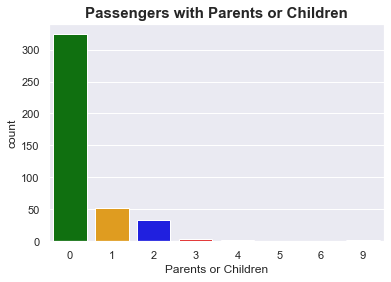

In [33]:
# Counts the number of passengers with Parents or Children
colors = ["green", "orange", "blue", "red", "violet"]
sn.countplot('Parch', data=pro_titanic, palette=colors)
mplt.xlabel('Parents or Children')
mplt.title('Passengers with Parents or Children', fontdict={'size':15, 'weight':'bold'})
mplt.show()

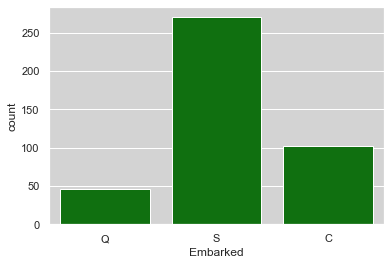

In [34]:
# Visualizes the embarked column
sn.countplot('Embarked', data= pro_titanic, color= 'green')
mplt.gca().set_facecolor('lightgray')
mplt.show()

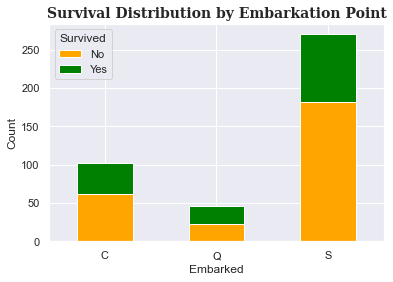

In [35]:
# Displays the proportion of survival for each embarkation point
survival_count = pro_titanic.groupby(['Embarked', 'Survived']).size().unstack()
colors = ['orange', 'green']
pt = survival_count.plot(kind= 'bar', stacked= True, color=colors)
pt.set_xlabel('Embarked')
pt.set_ylabel('Count')
pt.legend(title='Survived', labels= ['No', 'Yes'])
mplt.xticks(rotation=0)
mplt.title('Survival Distribution by Embarkation Point', 
           fontdict={'family':'serif', 'size':'14', 'weight':'bold'})
mplt.show()

#### To ease readability of the 'Survived' column, the main dataset was asssigned to a new variable to enable replacing the initial values to what they actually mean in the main context.

In [36]:

my_data = pro_titanic
my_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


In [37]:
my_data['Survived']  = my_data['Survived'].map({0: 'Non-Survivor', 1: 'Survivor'})

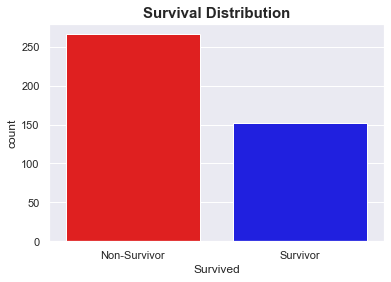

In [38]:
sn.countplot('Survived', data= my_data, palette = ["red", "blue"])
mplt.title('Survival Distribution', fontdict={'size':15, 'weight': 'bold'})
mplt.show()

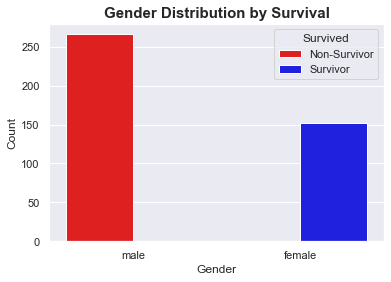

In [39]:
# Visualizes Survival proportion for each gender
"""Only one feature from the survival column exists
in each gender category"""

colors = ["red", "blue"]
sn.countplot(data= pro_titanic, x= 'Sex', hue= 'Survived',  palette= colors)
mplt.xlabel('Gender')
mplt.ylabel('Count')
mplt.title('Gender Distribution by Survival', fontdict={'size':15, 'weight':'bold'})
mplt.show()

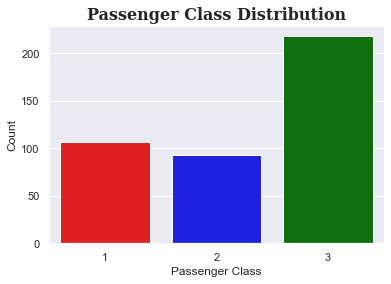

In [40]:
# Visualizes the Pclass column using a countplot
sn.countplot('Pclass', data= pro_titanic, palette = ["red", "blue", "green"])
mplt.xlabel('Passenger Class')
mplt.ylabel('Count')
mplt.title('Passenger Class Distribution',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

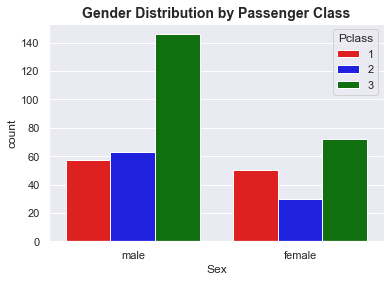

In [41]:
# Visualizes the arrangement of male and female in different passenger class
colors = ["red", "blue", "green"]
sn.countplot('Sex', hue= 'Pclass', data= pro_titanic, palette=colors)
mplt.title('Gender Distribution by Passenger Class', fontdict={'size':14, 'weight':'bold'})
mplt.show()

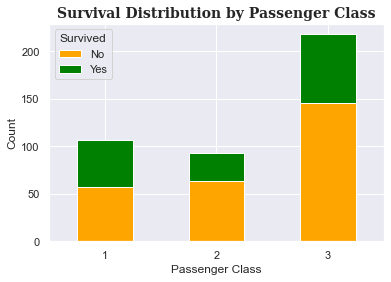

In [42]:
# Visualizing Survival by Passenger Class using a Stacked Bar
survival_count = pro_titanic.groupby(['Pclass', 'Survived']).size().unstack()
colors = ['orange', 'green']
pt = survival_count.plot(kind= 'bar', stacked= True, color= colors)
pt.set_xlabel('Passenger Class')
pt.set_ylabel('Count')
pt.legend(title= 'Survived', labels= ['No', 'Yes'])
mplt.xticks(rotation= 0)
mplt.title('Survival Distribution by Passenger Class',
            fontdict={'family': 'serif', 'size': 14, 'weight': 'bold'})
mplt.show()

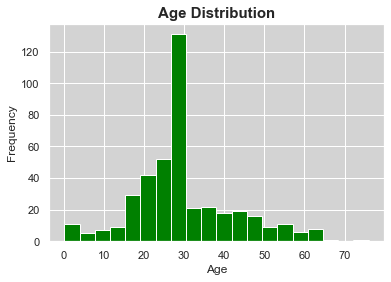

In [43]:
# Visualizes the distribution of age using a histogram
pt = pro_titanic['Age'].plot(kind='hist', bins= 20, color= 'green')
pt.set_xlabel('Age')
pt.set_ylabel('Frequency')
mplt.title('Age Distribution', fontdict={'size':15, 'weight':'bold'})
mplt.gca().set_facecolor('lightgray')
mplt.show()

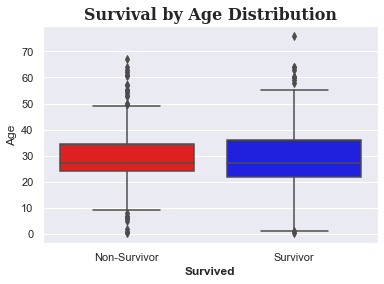

In [44]:
# Using a boxplot to display the age distribution by survival
colors = ['red', 'blue']
sn.boxplot(x= 'Survived', y= 'Age', data= pro_titanic, palette= colors)
mplt.xlabel('Survived', fontdict= {'weight': 'bold'})
mplt.ylabel('Age')
mplt.title('Survival by Age Distribution', 
            fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

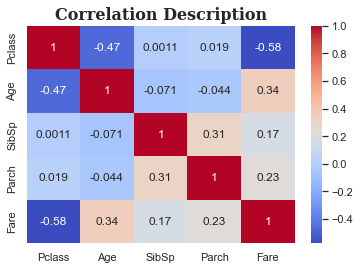

In [45]:
# Describe the correlation between variables
pro_titanic_corr = pro_titanic.select_dtypes('number').drop('PassengerId', axis= 1).corr()
sn.heatmap(pro_titanic_corr,  annot= True, cmap='coolwarm')
mplt.title('Correlation Description',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

## Data Preprocessing

In [46]:
# Change the categorical data to numerical data
# Sex column
pro_titanic['Sex'] = pro_titanic['Sex'].map({'male': 0, 'female':1})

In [47]:
pro_titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [48]:
# Change the categorical data to numerical data
# Embarked column
pro_titanic['Embarked'] = pro_titanic['Embarked'].map({'Q':0, 'S':1, 'C':2})

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
# To transform the 'Survived' column back to its initial state
pro_titanic['Survived'] = le.fit_transform(pro_titanic['Survived'])

In [51]:
pro_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,0
1,893,1,3,1,47.0,1,0,7.0000,1
2,894,0,2,0,62.0,0,0,9.6875,0
3,895,0,3,0,27.0,0,0,8.6625,1
4,896,1,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,27.0,0,0,8.0500,1
414,1306,1,1,1,39.0,0,0,108.9000,2
415,1307,0,3,0,38.5,0,0,7.2500,1
416,1308,0,3,0,27.0,0,0,8.0500,1


# Data Modelling

In [52]:
pro_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,0
1,893,1,3,1,47.0,1,0,7.0000,1
2,894,0,2,0,62.0,0,0,9.6875,0
3,895,0,3,0,27.0,0,0,8.6625,1
4,896,1,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,27.0,0,0,8.0500,1
414,1306,1,1,1,39.0,0,0,108.9000,2
415,1307,0,3,0,38.5,0,0,7.2500,1
416,1308,0,3,0,27.0,0,0,8.0500,1


In [53]:
# Assign columns to the X and y (probability) variable
X = pro_titanic.drop(['PassengerId', 'Survived', 'Fare'], axis= 1)
y = pro_titanic['Survived']

In [54]:
# Review the Feature matrix (X)
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,0
1,3,1,47.0,1,0,1
2,2,0,62.0,0,0,0
3,3,0,27.0,0,0,1
4,3,1,22.0,1,1,1
...,...,...,...,...,...,...
413,3,0,27.0,0,0,1
414,1,1,39.0,0,0,2
415,3,0,38.5,0,0,1
416,3,0,27.0,0,0,1


In [55]:
# Review the Target variable (y)
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int32

### Splitting Data into Set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [57]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
336,2,0,32.0,0,0,1
31,2,0,24.0,2,0,1
84,2,0,27.0,0,0,0
287,1,0,24.0,1,0,1
317,2,0,19.0,0,0,1
...,...,...,...,...,...,...
71,3,0,21.0,0,0,1
106,3,0,21.0,0,0,0
270,1,0,46.0,0,0,2
348,2,0,24.0,0,0,1


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 321 to 66
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    84 non-null     int64  
 1   Sex       84 non-null     int64  
 2   Age       84 non-null     float64
 3   SibSp     84 non-null     int64  
 4   Parch     84 non-null     int64  
 5   Embarked  84 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 4.6 KB


In [59]:
# Describe the shape of the train set
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(334, 6) (334,) (84, 6) (84,)


# Model Selection

In [60]:
# Assign the Machine learning Algorithm to a new variable
model = LogisticRegression()
model

LogisticRegression()

In [61]:
# Fit the trained Model
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Model Prediction
X_train_predict = model.predict(X_train)
X_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [63]:
X_test_predict = model.predict(X_test)
X_test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

# Model Evaluation

In [64]:
# Evaluate the Accuracy Score
accuracy_score(y_train, X_train_predict) * 100

100.0

In [65]:
model.score(X_train, y_train) * 100

100.0

In [66]:
# Evaluate the Accuracy Score
accuracy_score(y_test, X_test_predict) * 100

100.0

In [67]:
model.score(X_test, y_test) * 100

100.0

### Using GradientBoostingClassifier

In [68]:
# Imports the GBC machine learning algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [69]:
# Fit the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [70]:
# GBC X train Prediction
gbc_pred1 = gbc.predict(X_train)


In [71]:
# GBC X test Prediction
gbc_pred2 = gbc.predict(X_test)

In [73]:
# Test accuracy score of the GBC X_train prediction
accuracy_score(y_train, gbc_pred1) * 100

100.0

In [74]:
# Test accuracy score of the GBC X_test prediction
accuracy_score(y_test, gbc_pred2) * 100

100.0

## Model Validation

In [75]:
# Performs a cross-validation to assess the performance of model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [76]:
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state= 42)

In [77]:
scores = cross_val_score(model, X, y, cv=kf, scoring= 'accuracy')
average_accuracy = scores.mean() * 100
print('Average_accuracy:', average_accuracy)

Average_accuracy: 100.0
